In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Particle:
    def __init__(self, x, y, vx, vy, mass):
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        self.mass = mass
        
    def update(self, Fx, Fy, dt):
        self.vx = self.vx + Fx / self.mass * dt
        self.vy = self.vy + Fy / self.mass * dt
        self.x = self.x + self.vx * dt
        self.y = self.y + self.vy * dt
        
    def pairwise_force(self, particle):
        r2 = (self.x - particle.x)**2.0 + \
             (self.y - particle.y)**2.0
        F_mag = -(G * particle.mass * self.mass)/r2
        F_x = (self.x - particle.x)/r2**0.5 * F_mag
        F_y = (self.y - particle.y)/r2**0.5 * F_mag
        return (F_x, F_y)

In [3]:
class Potential:
    acceleration = -9.8
    def compute(self, x, y, t, mass):
        return (0.0, mass * self.acceleration)

In [4]:
class System:
    def __init__(self, potential, particles):
        self.potential = potential
        self.particles = particles
        self.t = 0.0
        
    def update(self, dt):
        for particle in self.particles:
            Fx, Fy = self.potential.compute(
                particle.x, particle.y,
                self.t, particle.mass)
            particle.update(Fx, Fy, dt)
        self.t += dt

In [5]:
xs = [ [], [] ]
ys = [ [], [] ]

potential = Potential()
particles = [Particle(0, 0, +0.1, 0, 1.0),
             Particle(1, 1, -1, 0, 2.0)]
system = System(potential, particles)

t_final = 10.0
dt = 0.1

while t_final > system.t:
    for i, particle in enumerate(system.particles):
        xs[i].append(particle.x)
        ys[i].append(particle.y)
    system.update(dt)

In [6]:
system.t

10.09999999999998

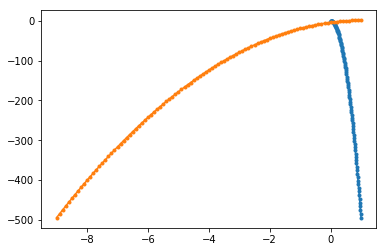

In [7]:
plt.plot(xs[0], ys[0], '.-')
plt.plot(xs[1], ys[1], '.-')

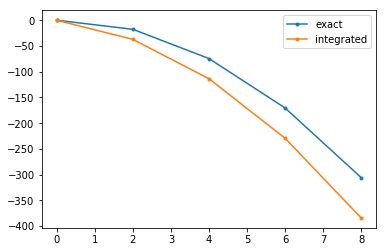

In [14]:
xs = []
ys = []
x_ex = []
y_ex = []

x0 = 0.0
y0 = 0.0
vx0 = 0.0
vy0 = 1.0

potential = Potential()
particles = [Particle(x0, y0, vx0, vy0, 1.0)]
system = System(potential, particles)

t_final = 10.0
dt = 2.0
ts = []

while t_final > system.t:
    xs.append(system.particles[0].x)
    ys.append(system.particles[0].y)
    x_ex.append(x0 + vx0 * system.t)
    y_ex.append(y0 + vy0 * system.t +
                0.5 * potential.acceleration * system.t**2)
    ts.append(system.t)
    system.update(dt)

plt.plot(ts, y_ex, '.-', label='exact')
plt.plot(ts, ys, '.-', label='integrated')
plt.legend()

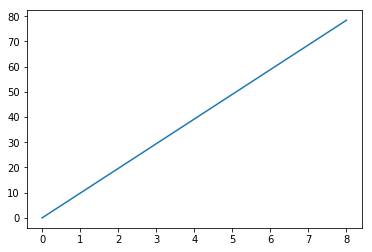

In [15]:
y_ex = np.array(y_ex)
ys = np.array(ys)

plt.plot(ts, (np.abs(ys - y_ex)))